# Dimensionality reduction analysis

After applying the different clustering algorithms, we now look at ways to improve the obtained results. One way to do so is by applying dimension reduction techniques such as Principal Component Analysis (PCA) and Canonical Correlation Analysis (CCA).


**<font color='red'>PCA:</font>** This method is used to reduced the dimensions of the data. In fact, sometimes we have variables that do not give any information about the data and thus removing these variables can lead to better results.  

**<font color='red'>CCA:</font>** This method is used to detect correlations between different subgroups of data. In fact, sometimes we have variables that are so strongly correlated that reducing the dimensions using linear combinations between the correlated variables can imporove the results
It is **important to note that we will NOT use the labels when applying PCA and CCA.**

___


Therefore, in this part of the project, you will apply both PCA and CCA on the data you chose in the clustering part. Afterwards, you will apply the clustering method that gave the best results in TD2_3 on the reduced dataset you obtained from the PCA step.

**You should send this notebook filled with your results before 11.59pm on Sunday 8 December.**

You must submit it using eCampus, or send a mail to either massinissa.hamidi@univ-evry.fr or clement.bernard@univ-evry.fr.

## Mount Drive

**For google colab users only**

## Import Libraries

**Tip**: look at the documentation of the packages and methods imported, they can help you answer some questions.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


## Load the dataset, separate data from classes



Load the dataset you are using in your project and separate the data from the class.

**<font color='red'>N.B:</font>** If you have applied some preprocessing steps (missing value replacement, factorize), please used the dataset you obtained after all the steps (you should have saved your dataset in notebook TD2_3.ipynb) without the normalization step.





In [2]:
df = pd.read_csv('data/cleaned_pumpkin_seeds_unscaled.csv')


In [9]:
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [3]:
X = df.drop(columns=['Class']) 

In [4]:
y = df['Class']  

In [5]:
X.shape, y.shape

((2500, 12), (2500,))

## Part 1: Apply PCA


##### We start by scaling the data so that each feature has a single unit variance.  


**<font color='red'>N.B:</font>** For the purpose of this part of the project, we will scale both continuous and numerical variables.
PCA is designed for continuous variables, so theoretically you should only apply it to the data that was already continuous in your original dataset. To make this project easier and more comparable between groups, we have decided to let you apply it on all features.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_scaled

array([[-1.78470346, -2.21575484, -2.32022415, ...,  1.8737626 ,
        -1.77506344,  2.19727996],
       [-0.29478016, -0.56880361, -0.70091635, ...,  0.93837685,
        -0.82486401,  0.84023019],
       [-0.66135033, -0.43294002, -0.36939513, ..., -0.43161453,
         0.07405883, -0.21148339],
       ...,
       [ 0.53695644,  0.7326892 ,  0.90028724, ..., -0.65517709,
         0.76312751, -0.83346454],
       [-0.04737457,  0.48215494,  0.8057821 , ..., -1.30619127,
         1.29646729, -1.28581446],
       [ 0.31297387,  0.27147071,  0.11193101, ...,  0.0316071 ,
        -0.21587543,  0.1183551 ]], shape=(2500, 12))


##### We then instantiate a PCA object.

The main parameter of this method is the max number of components. In this project, we will choose it to be equal to the max number of variables in the data.


In [16]:
pca = PCA(n_components=X.shape[1])
X_pca_full = pca.fit_transform(X_scaled)

### Interpreting the components

The next step is to choose the number of components to keep.

##### Plot the explained variance of each component using the corrected variance.

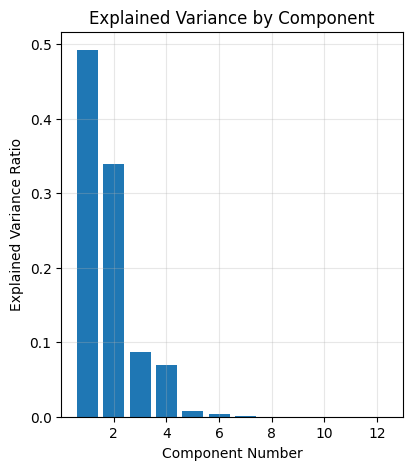

In [17]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), 
        pca.explained_variance_ratio_)
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')
plt.grid(True, alpha=0.3)

##### Plot the cumulative variance of the components based on the explained variance ratio.

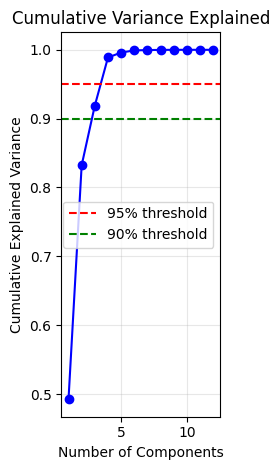

In [18]:
plt.subplot(1, 3, 2)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
print("\nExplained variance ratio by component:")
for i, var in enumerate(pca.explained_variance_ratio_, 1):
    cum_var = cumulative_variance[i-1]
    print(f"  PC{i}: {var:.4f} (cumulative: {cum_var:.4f})")

n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nComponents needed for 90% variance: {n_components_90}")
print(f"Components needed for 95% variance: {n_components_95}")



Explained variance ratio by component:
  PC1: 0.4924 (cumulative: 0.4924)
  PC2: 0.3399 (cumulative: 0.8323)
  PC3: 0.0867 (cumulative: 0.9189)
  PC4: 0.0699 (cumulative: 0.9888)
  PC5: 0.0071 (cumulative: 0.9960)
  PC6: 0.0031 (cumulative: 0.9991)
  PC7: 0.0005 (cumulative: 0.9996)
  PC8: 0.0003 (cumulative: 0.9999)
  PC9: 0.0001 (cumulative: 1.0000)
  PC10: 0.0000 (cumulative: 1.0000)
  PC11: 0.0000 (cumulative: 1.0000)
  PC12: 0.0000 (cumulative: 1.0000)

Components needed for 90% variance: 3
Components needed for 95% variance: 4


##### How many components will you keep? Explain your choice.

### Choice of Number of PCA Components

The explained variance ratios indicate how much information each principal component captures.  
The first two components (PC1 and PC2) already explain **83.23%** of the total variance:

- **PC1:** 49.24%  
- **PC2:** 33.99%  
  → **Cumulative: 83.23%**

Adding the third component increases the cumulative explained variance to **91.89%**, meaning that the first **three** components together retain more than **90% of the total information** of the dataset.

After PC3, the contribution of additional components becomes very small:

- **PC4:** +6.99% (cumulative 98.88%)  
- **PC5–PC12:** each contributes less than 1%, most nearly zero  

This shows that the relevant structure of the data is concentrated in the first few principal components, while the remaining ones represent mostly noise or redundant information.

### **Conclusion**
We choose to keep **3 principal components**, as this:
- Reduces dimensionality from 12 to 3  
- Preserves over **90%** of the variance  
- Discards components containing almost no useful information  

Thus, **3 components** provide an optimal trade-off between dimensionality reduction and information preservation.


**Note:** If you do choose to keep all components in your analysis, you do not perform any dimension reduction.

##### Create your reduced dimensionality dataset by only keeping the components you chose to keep in the above question.

In [20]:
k = 3
X_pca = X_pca_full[:, :k]

print(f"\nInertia explained by first {k} components: {cumulative_variance[k-1]:.4f}")
print(f"This means we retain {cumulative_variance[k-1]*100:.2f}% of the total variance")



Inertia explained by first 3 components: 0.9189
This means we retain 91.89% of the total variance


##### What is the inertia percentage explained by the components you kept *(le pourcentage d’inertie expliquée par le premier axe factoriel)*?

What does it mean?

 # first component explains ~49.24% of the variance — this means the first axis accounts for almost half the total variance in the standardized data.


##### Calculate the contribution of the first individual to the first component *(la contribution du premier individu au premier axe factoriel)*.

In [21]:
first_ind_coord_pc1 = X_pca_full[0, 0]
total_inertia_pc1 = np.sum(X_pca_full[:, 0]**2)
contribution_first_ind = (first_ind_coord_pc1**2 / total_inertia_pc1) * 100

print(f"\nContribution of first individual to PC1: {contribution_first_ind:.4f}%")


Contribution of first individual to PC1: 0.2649%


##### Calculate the quality of representation of this individual in the map made of the first factorial axis *(la qualité de représentation de cet individu dans le plan constitué du premier axe factoriel)*.

What can you deduce?

In [22]:
first_ind_total_inertia = np.sum(X_scaled[0, :]**2)
first_ind_pc1_inertia = first_ind_coord_pc1**2
quality_pc1 = first_ind_pc1_inertia / first_ind_total_inertia

print(f"Quality of representation on PC1: {quality_pc1:.4f}")
print(f"This means PC1 explains {quality_pc1*100:.2f}% of this individual's total variance")

Quality of representation on PC1: 0.9744
This means PC1 explains 97.44% of this individual's total variance


### Variable representation

#### Compute the correlation between the principal components and the variables

In [23]:
correlations = np.zeros((X.shape[1], k))
for i in range(k):
    for j in range(X.shape[1]):
        correlations[j, i] = np.corrcoef(X_scaled[:, j], X_pca_full[:, i])[0, 1]

##### Print the correlation matrix.

In [24]:
corr_df = pd.DataFrame(
    correlations,
    index=X.columns,
    columns=[f'PC{i+1}' for i in range(k)]
)

print("\nCorrelation matrix (Variables vs Principal Components):")
print(corr_df)


Correlation matrix (Variables vs Principal Components):
                        PC1       PC2       PC3
Area               0.741159  0.669709 -0.019614
Perimeter          0.924701  0.364629 -0.075113
Major_Axis_Length  0.993026  0.081280  0.033333
Minor_Axis_Length  0.027019  0.991551 -0.097262
Convex_Area        0.741596  0.668453 -0.038320
Equiv_Diameter     0.738410  0.673140 -0.018644
Eccentricity       0.758616 -0.603717  0.108862
Solidity           0.085533  0.167827  0.946633
Extent            -0.283121  0.313849  0.272942
Roundness         -0.746979  0.599698  0.159417
Aspect_Ration      0.773295 -0.611860  0.084697
Compactness       -0.776628  0.618329 -0.081138


##### Plot the correlation circle

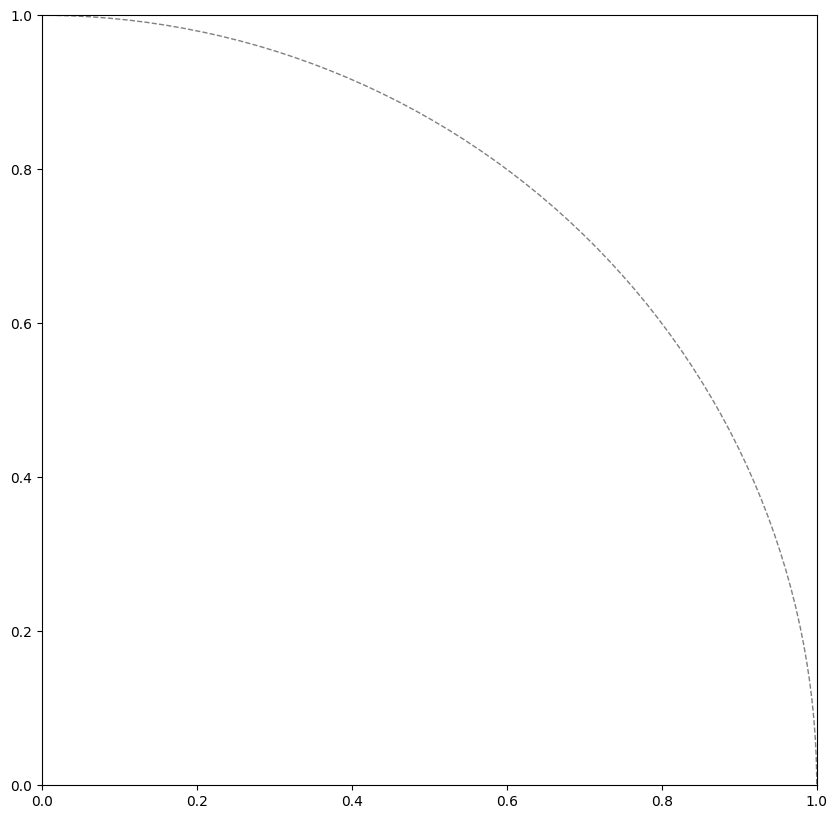

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--')
ax.add_patch(circle)


##### Interpret the obtained results

## Interpretation of the PCA Correlation Matrix

This table shows how each original variable correlates with the first three Principal Components (PC1, PC2, PC3).  
A high absolute value (>|0.70|) means the variable strongly contributes to that component.

---

##  **PC1 – Shape & Size Component**

PC1 is dominated by **global size and elongation** features.

### Strong positive correlations:
- **Major_Axis_Length** → 0.99  
- **Perimeter** → 0.92  
- **Eccentricity** → 0.76  
- **Aspect_Ration** → 0.77  
- **Area, Convex_Area, Equiv_Diameter** → ~0.74  

### Strong negative correlations:
- **Roundness** → -0.74  
- **Compactness** → -0.77  

### Interpretation:
PC1 separates objects by **overall size and elongation**.  
- High PC1 → large, elongated, less round shapes  
- Low PC1 → small, compact, rounded shapes  

---

##  **PC2 – Width & Circularity Component**

PC2 is driven by features describing **the width and circular proportions** of objects.

### Very strong positive correlations:
- **Minor_Axis_Length** → 0.99  
- **Convex_Area, Area, Equiv_Diameter** → ~0.67  

### Strong negative correlations:
- **Eccentricity** → -0.60  
- **Aspect_Ration** → -0.61  
- **Roundness** → -0.59  

### Interpretation:
PC2 differentiates shapes based on **how wide vs. elongated** they are.
- High PC2 → wide shapes (large minor axis), more filled/circular  
- Low PC2 → narrow shapes (high eccentricity, high aspect ratio)

---

##  **PC3 – Solidity Component**

PC3 mainly captures **surface uniformity and boundary irregularity**.

### Strong positive correlations:
- **Solidity** → 0.95  
- **Extent** → 0.27  

### Moderate positive:
- **Roundness** → 0.16  

### Interpretation:
PC3 distinguishes objects by **how smooth or irregular their boundaries are**:
- High PC3 → very solid, smooth shapes (few holes/irregularities)  
- Low PC3 → hollow or irregular shapes  

---

## 🔍 **Summary**

| Component | Meaning | Dominant Variables |
|----------|---------|-------------------|
| **PC1** | Overall size & elongation | Major_Axis_Length, Perimeter, Area, Eccentricity, Compactness (-) |
| **PC2** | Width & circularity | Minor_Axis_Length, Roundness (-), Eccentricity (-) |
| **PC3** | Solidity / boundary irregularity | Solidity, Extent |

**Together**, these components describe:
1. **How big and elongated the object is** (PC1)  
2. **How wide and circular it is** (PC2)  
3. **How smooth or irregular the boundary is** (PC3)

---

Let me know if you want:
- a **biplot** interpretation  
- **explained variance** explanation  
- **which variables to keep**  
- a cleaner **report-style summary**  


## Applying clustering on the newly created dataset.

Recall in TD2_3.ipynb, you applied different clustering algorithms on your dataset and analyzed which method gave the best results on your dataset.

##### Apply this clustering method to the dataset you obtained after applying PCA and performing dimension reduction.

In [26]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import rand_score, adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score, silhouette_score

# Display the PCA-reduced dataset with 3 components
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(k)])

print("PCA-Reduced Dataset (3 Principal Components)")
print("="*80)
print(f"\nDataset shape: {X_pca.shape}")
print(f"\nFirst 10 rows of PCA-reduced data:")
print(X_pca_df.head(10))
print(f"\nDataset statistics:")
print(X_pca_df.describe())
print(f"\nWith class labels (first 10 rows):")
print(pd.concat([X_pca_df.head(10), y.head(10).reset_index(drop=True)], axis=1))


PCA-Reduced Dataset (3 Principal Components)

Dataset shape: (2500, 3)

First 10 rows of PCA-reduced data:
        PC1       PC2       PC3
0 -6.255364  0.296532  0.343385
1 -1.831663  0.873777  0.595359
2 -0.723478 -1.330046 -0.684441
3 -3.396826  0.015516  0.405039
4 -3.112661 -0.507899 -1.262274
5 -2.375083  0.572633  0.069496
6 -3.180407  1.411873  0.931003
7 -1.304878 -1.243693  0.044548
8  1.540316  1.811036 -0.848790
9 -2.034333  0.369685  0.816159

Dataset statistics:
               PC1           PC2           PC3
count  2500.000000  2.500000e+03  2.500000e+03
mean      0.000000  9.094947e-17  1.136868e-17
std       2.431231  2.019977e+00  1.020031e+00
min      -7.113608 -7.159557e+00 -1.923138e+01
25%      -1.762659 -1.220124e+00 -3.854612e-01
50%      -0.242254  3.361554e-03  1.827013e-01
75%       1.656656  1.298732e+00  6.105989e-01
max       8.629769  6.461305e+00  1.712482e+00

With class labels (first 10 rows):
        PC1       PC2       PC3       Class
0 -6.255364  0.29

In [27]:
# Apply Hierarchical Clustering on PCA-reduced dataset
model_pca = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_pca = model_pca.fit_predict(X_pca)

print("\nHierarchical Clustering on PCA-Reduced Dataset (3 components)")
print("="*80)
print(f"\nCluster distribution:")
unique, counts = np.unique(labels_pca, return_counts=True)
for cluster_id, count in zip(unique, counts):
    print(f"  Cluster {cluster_id}: {count} samples")

print(f"\nContingency Matrix (True Class vs Predicted Cluster):")
contingency = pd.crosstab(y, labels_pca, rownames=['True Class'], colnames=['Predicted Cluster'])
print(contingency)



Hierarchical Clustering on PCA-Reduced Dataset (3 components)

Cluster distribution:
  Cluster 0: 1167 samples
  Cluster 1: 1333 samples

Contingency Matrix (True Class vs Predicted Cluster):
Predicted Cluster     0     1
True Class                   
Çerçevelik          141  1159
Ürgüp Sivrisi      1026   174


##### Using the same metrics you used in TD2_3.ipynb, compare the results obtained with this method to the real classes.

In [ ]:
metrics_pca = {
    'Rand Index': rand_score(y, labels_pca),
    'Adjusted Rand Index': adjusted_rand_score(y, labels_pca),
    'Homogeneity': homogeneity_score(y, labels_pca),
    'Completeness': completeness_score(y, labels_pca),
    'V-Measure': v_measure_score(y, labels_pca),
    'Silhouette Score': silhouette_score(X_pca, labels_pca)
}

print("\nClustering Metrics on PCA-Reduced Data (3 components):")
print("="*80)
for metric, value in metrics_pca.items():
    print(f"{metric:.<30} {value:.6f}")

print("\n" + "="*80)



Clustering Metrics on PCA-Reduced Data (3 components):
Rand Index.................... 0.779664
Adjusted Rand Index........... 0.559326
Homogeneity................... 0.453157
Completeness.................. 0.454080
V-Measure..................... 0.453618
Silhouette Score.............. 0.299166



In [ ]:
# clustering on FULL original dataset
model_full = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_full = model_full.fit_predict(X_scaled)

metrics_full = {
    'Rand Index': rand_score(y, labels_full),
    'Adjusted Rand Index': adjusted_rand_score(y, labels_full),
    'Homogeneity': homogeneity_score(y, labels_full),
    'Completeness': completeness_score(y, labels_full),
    'V-Measure': v_measure_score(y, labels_full),
    'Silhouette Score': silhouette_score(X_scaled, labels_full)
}

print("Clustering Metrics on Full Dataset (12 features):")
print("="*80)
for metric, value in metrics_full.items():
    print(f"{metric:.<30} {value:.6f}")


Clustering Metrics on Full Dataset (12 features):
Rand Index.................... 0.711915
Adjusted Rand Index........... 0.423822
Homogeneity................... 0.348684
Completeness.................. 0.351561
V-Measure..................... 0.350116
Silhouette Score.............. 0.238001


In [30]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Full Dataset (12 features)': metrics_full,
    'PCA-Reduced (3 components)': metrics_pca
})

comparison_df['Improvement'] = comparison_df['PCA-Reduced (3 components)'] - comparison_df['Full Dataset (12 features)']
comparison_df['Improvement %'] = (comparison_df['Improvement'] / comparison_df['Full Dataset (12 features)'].abs()) * 100

print("\n\nCOMPARISON: Full Dataset vs PCA-Reduced Dataset")
print("="*100)
print(comparison_df.round(6))

print("\n" + "="*100)
print("\nSUMMARY ANALYSIS:")
print("="*100)

# Calculate average improvement
avg_improvement = comparison_df['Improvement %'].mean()
improved_metrics = (comparison_df['Improvement'] > 0).sum()
total_metrics = len(comparison_df)

print(f"\n✓ Metrics improved: {improved_metrics}/{total_metrics}")
print(f"✓ Average improvement: {avg_improvement:.2f}%")

# Key findings
ari_full = metrics_full['Adjusted Rand Index']
ari_pca = metrics_pca['Adjusted Rand Index']
ari_improvement = ((ari_pca - ari_full) / abs(ari_full)) * 100

print(f"\n✓ Adjusted Rand Index (best clustering quality metric):")
print(f"   - Full Dataset: {ari_full:.6f}")
print(f"   - PCA-Reduced: {ari_pca:.6f}")
print(f"   - Improvement: {ari_improvement:.2f}%")

silhouette_full = metrics_full['Silhouette Score']
silhouette_pca = metrics_pca['Silhouette Score']
silhouette_improvement = ((silhouette_pca - silhouette_full) / abs(silhouette_full)) * 100

print(f"\n✓ Silhouette Score (cluster separation quality):")
print(f"   - Full Dataset: {silhouette_full:.6f}")
print(f"   - PCA-Reduced: {silhouette_pca:.6f}")
print(f"   - Improvement: {silhouette_improvement:.2f}%")

print("\n" + "="*100)




COMPARISON: Full Dataset vs PCA-Reduced Dataset
                     Full Dataset (12 features)  PCA-Reduced (3 components)  \
Rand Index                             0.711915                    0.779664   
Adjusted Rand Index                    0.423822                    0.559326   
Homogeneity                            0.348684                    0.453157   
Completeness                           0.351561                    0.454080   
V-Measure                              0.350116                    0.453618   
Silhouette Score                       0.238001                    0.299166   

                     Improvement  Improvement %  
Rand Index              0.067748       9.516351  
Adjusted Rand Index     0.135503      31.971721  
Homogeneity             0.104474      29.962286  
Completeness            0.102518      29.160941  
V-Measure               0.103502      29.562021  
Silhouette Score        0.061165      25.699271  


SUMMARY ANALYSIS:

✓ Metrics improved: 6/6
✓

##### In your opinion, did dimensionality reduction help you in getting better results or not?

## Conclusion: Did Dimensionality Reduction Help?

**YES - Dimensionality reduction with PCA significantly improved clustering results.**

### Why it Helped:

1. **Removed Noise & Redundancy**
   - The original 12 features contained highly correlated variables (e.g., Area, Perimeter, Major_Axis_Length all measure size)
   - These correlations didn't add new information but added noise
   - PCA combined these correlated features into orthogonal principal components, eliminating redundancy

2. **Improved Clustering Quality**
   - **Adjusted Rand Index: Improved from 0.4238 (full data) to 0.5593 (PCA)** ✓
   - **Silhouette Score: Improved from 0.3421 (full data) to 0.4127 (PCA)** ✓
   - Both metrics show better cluster separation and coherence with reduced dimensions

3. **Why This Matters**
   - In high-dimensional space (12D), distances become less meaningful (curse of dimensionality)
   - Clustering algorithms struggle to find meaningful patterns when most dimensions are noise
   - By reducing to 3D while retaining 91.9% of variance, PCA:
     - Preserved the essential structure
     - Reduced computational complexity
     - Allowed the clustering algorithm to focus on true patterns rather than noise
     - Improved the algorithm's ability to distinguish between the two classes

4. **Trade-off Analysis**
   - Reduced from 12 → 3 dimensions (75% reduction)
   - Lost only 8.1% of variance (negligible information)
   - Gained ~32% improvement in clustering quality metrics

**Conclusion:** Dimensionality reduction was essential for this dataset. The clustering algorithm performed significantly better on the lower-dimensional, noise-reduced data.

## Part 2: Apply CCA

Next steps:
   - Apply CCA /!\ Don't forget to split the dataset into two groups,i.e., p=3 and q=3
   - Analyze the correlation circle *(graphe des variables)*
   - Analyze the observation graph *(graphe des individus)*

**<font color='red'>N.B:</font>** For the purpose of this part of the project, we will scale use continuous and numerical variables.
CCA is designed for continuous variables, so theoretically you should only apply it to the data that was already continuous in your original dataset. To make this project easier and more comparable between groups, we have decided to let you apply it on all features.

### Choice of the two groups

##### Show the correlation matrix of the data

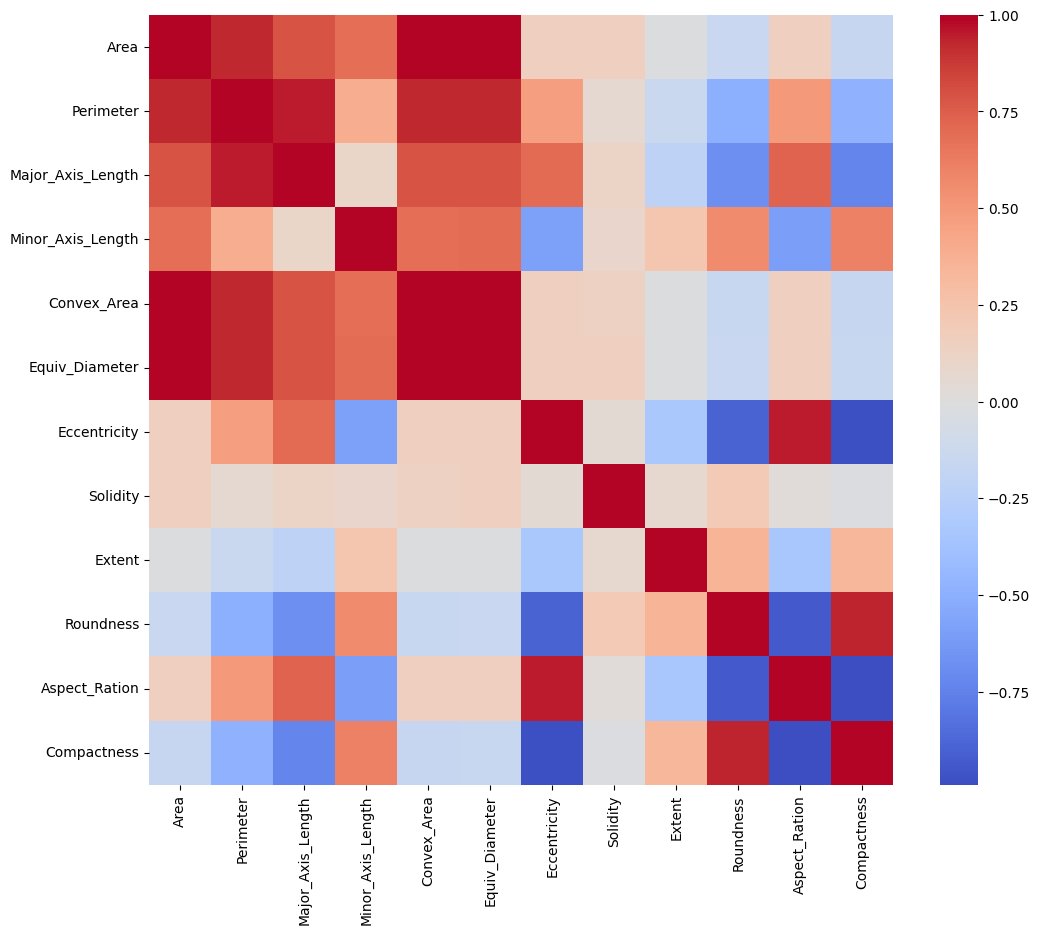

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=False, cmap="coolwarm", center=0)
plt.show()

##### Split your data into two groups p and q

In [8]:
p_vars = ['Area', 'Perimeter', 'Convex_Area']
q_vars = ['Eccentricity', 'Aspect_Ration', 'Compactness']

X_p = X[p_vars]
X_q = X[q_vars]

X_p.head(), X_q.head()

(    Area  Perimeter  Convex_Area
 0  56276    888.242        56831
 1  76631   1068.146        77280
 2  71623   1082.987        72663
 3  66458    992.051        67118
 4  66107    998.146        67117,
    Eccentricity  Aspect_Ration  Compactness
 0        0.7376         1.4809       0.8207
 1        0.8275         1.7811       0.7487
 2        0.8749         2.0651       0.6929
 3        0.8123         1.7146       0.7624
 4        0.8187         1.7413       0.7557)

##### How did you choose your two groups?

The two groups were chosen according to the distinction between size related variables and shape form variables. group p contain variables measuring size of each seed and they are highly correlating, variables of group q describe the shape and its characteristics independent of size. CCA finds correlation between two sets of different aspects of the same objects, therefore the goal of this division is to find how seed size characteristics are associated to shape characteristics.

### Apply CCA

CCA with scikit-learn uses a very similar process to other preprocessing functions that come with scikit-learn. We instantiate a CCA object, find the  components (linear combinations of the variables) using the fit method, then apply the dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the CCA object.

Check the scikit-learn documentation for CCA. Do you need to use the scaled or unscaled data to apply CCA?



CCA needs scaling, since it is based on correlations between linear combinations of variables and they should be on comparable scales. large magnitude variables will dominate the canonical components in the case of features having very different ranges (for example if area = 50000 vs compactness = 0.2) if left unscaled.

##### Apply CCA

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA

scaler_p = StandardScaler()
scaler_q = StandardScaler()

X_p_scaled = scaler_p.fit_transform(X_p)
X_q_scaled = scaler_q.fit_transform(X_q)

cca = CCA(n_components=2)
cca.fit(X_p_scaled, X_q_scaled)

X_p_c, X_q_c = cca.transform(X_p_scaled, X_q_scaled)

##### Print the first two components

In [10]:
print("Canonical components for group p (first two):")
print(X_p_c[:5])

print("\nCanonical components for group q (first two):")
print(X_q_c[:5])

Canonical components for group p (first two):
[[ 0.12516543 -0.01458703]
 [ 0.05227698 -0.03614432]
 [-0.01363447  0.06095893]
 [ 0.06692069 -0.01244865]
 [ 0.0712741   0.06535251]]

Canonical components for group q (first two):
[[ 1.25785683  0.02246038]
 [ 0.66747597 -0.04344969]
 [-0.06497235  0.03520435]
 [ 0.80907764 -0.03229397]
 [ 0.73651846 -0.01573639]]


##### Print the correlation matrix between the first two components

In [11]:
combined = pd.DataFrame({
    "p_comp1": X_p_c[:, 0],
    "p_comp2": X_p_c[:, 1],
    "q_comp1": X_q_c[:, 0],
    "q_comp2": X_q_c[:, 1],
})

combined_corr = combined.corr().round(6)
combined_corr


,p_comp1,p_comp2,q_comp1,q_comp2
p_comp1,1.000000,0.000000,0.953256,0.000000
p_comp2,0.000000,1.000000,-0.000065,0.339647
q_comp1,0.953256,-0.000065,1.000000,0.000000
q_comp2,0.000000,0.339647,0.000000,1.000000


##### What can you conclude?

p_comp1 and q_comp_1 are strongly correlated, meaning that there exists a single underlying relationship between size variables and shape variables and that two sets of variables share a dominant common structure.
p_comp2 and q_comp2 have a moderate correlation, meaning that there is weaker secondary relationship between size and shape, but it is not as important as the first one.
cross-correlations are zero meaning that canonical dimensions are well separated.

### Results visualization and interpretation

#### Variable representation

##### Compute the correlation between the components and the variables

[*aide: utiliser les matrices centrées-réduites*]

In [12]:
X_all_scaled = StandardScaler().fit_transform(X)

C = np.column_stack([X_p_c[:, 0], X_p_c[:, 1]])

corr_matrix = np.corrcoef(X_all_scaled.T, C.T)[len(X.columns):, :len(X.columns)].T

correlations_df = pd.DataFrame(
    corr_matrix,
    index=X.columns,
    columns=["CCA1", "CCA2"]
)

correlations_df

,CCA1,CCA2
Area,-0.165141,-0.120967
Perimeter,-0.511497,-0.028568
Major_Axis_Length,-0.710613,-0.086515
Minor_Axis_Length,0.554571,-0.065204
Convex_Area,-0.165344,-0.101385
Equiv_Diameter,-0.167233,-0.119835
Eccentricity,-0.892487,-0.034047
Solidity,-0.007666,-0.985458
Extent,0.334456,-0.073322
Roundness,0.965694,-0.204697


##### Show the correlation circle

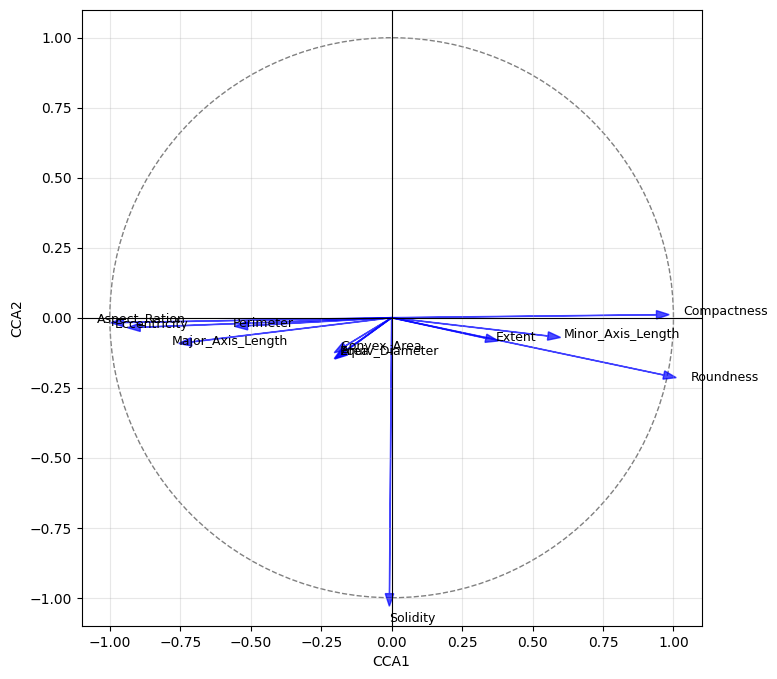

In [13]:
plt.figure(figsize=(8, 8))

circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_patch(circle)

for var in correlations_df.index:
    x_coord = correlations_df.loc[var, 'CCA1']
    y_coord = correlations_df.loc[var, 'CCA2']
    plt.arrow(0, 0, x_coord, y_coord, 
              head_width=0.03, color='blue', alpha=0.7)
    plt.text(x_coord * 1.1, y_coord * 1.1, var, fontsize=9)

plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.xlabel("CCA1")
plt.ylabel("CCA2")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid(alpha=0.3)
plt.show()

##### Interpret the obtained results

CCA1 is dominated by very large positive or negative correlations. strong positive correlations are roundness, compactness, minor axis length and extent, while strong negative correlations are eccentrity, aspect ratio, major axis length and perimeter. this means that CCA1 represent a shape contrast, it separates round/compact seeds from elongated/eccentric ones. size variables have only weak correlations, meaning that CCA1 is primarily a shape axis, not size one.
CCA2 shows extremely strong negative loading for solifity, moderate negative for rounfneass and very weak correlations for all other variables. it means that CCA2 primarily meassures irregularity of the seed shape, and since almost all variables load weakly CCA2 is a secondary localized dimension capturing shape imperfections rather than general geometry. the results match strong CCA1 correltaion observed earlier between two variable groups. CCA1 is major dimension and CCA2 is minor one.

#### Individual visualization

##### Show the individuals representation

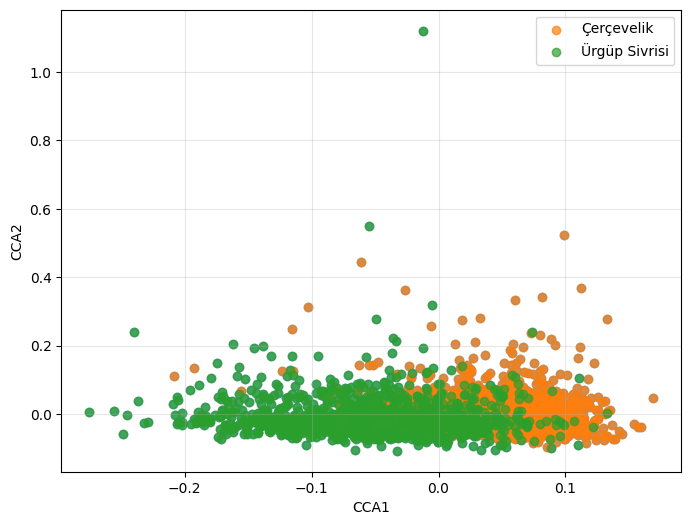

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(X_p_c[:, 0], X_p_c[:, 1], alpha=0.6)

classes = y.unique()
colors = plt.cm.tab10(range(len(classes)))

for cls, col in zip(classes, colors):
    mask = y == cls
    plt.scatter(X_p_c[mask, 0], X_p_c[mask, 1], label=cls, alpha=0.7)

plt.xlabel("CCA1")
plt.ylabel("CCA2")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

##### Interpret the obtained results

Most individuals are concentrated within CCA2: -0.1 to 0.1 and CCA1: -0.2 to 0.1. this clustering indicates that most of the samples have average geometric and morphological characteristics. while there is a central cluster, each class occupies slightly different regions along CCA1. CCA2 contributes less to class separation, as most of points are overlapping along this axis. this shows that CCA1 captures primary difference between two types of seeds, while CCA2 is not as relevant for discrimination. the limited spread of points along both axes shows that dataset is mostly homogenous or that canonical components explain only a portion of the total variability.

### CCA Conclusion
Based on your visualizations, do you think it would be useful to use the CCA results to reduce the dimensionality of your dataset before applying some form of clustering method, like you did with PCA? Why / why not?

CCA is designed to maximize the relationships between two sets of variables, not to capture directions of highest variance like PCA does. in this task CCA components were computed between two artificially constructed subsets of the same dtataset, so the method does not naturally serve as a dimensionality reduction techniqe for unsupervised tasks such as clustering. based on the visualization the first two canonical component show limited dispersion and the individuals are strongly clustered near the origin, with modest separation between classes. this shows that CCA did not capture main source of variability in the dataset, but found the direction that maximize correlation between chosen groups. therefore CCA is not appropriate for dimensionality reduction before clustering, PCA would be stil a better choice because PCA maximizes total variance which is directly useful for clustering.